##### The methods i used to classify the virus in the given dataset are mentioned below
##### 1.logistic regression
##### 2.decission tree
##### 3.SVC
##### 4.KNN
##### 5.feature selection
##### 6.random forest

importing the required libraries

In [1]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

reading the given data set

In [2]:
data=pd.read_csv("C:/Users/pragathi/Downloads/data602_exam.csv")

printing the top 5 columns of the given dataset

In [3]:
data.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.0,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.0,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.0,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.0,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.0,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1


printing the target column to find how many different target values are available in the given dataset

In [4]:
data['target']

0       2
1       8
2       6
3       4
4       1
       ..
4994    4
4995    3
4996    3
4997    2
4998    9
Name: target, Length: 4999, dtype: int64

from the above data it is understood that there are 9 different target values are available in the given dataset

printing the shape of the dataset

In [5]:
data.shape

(4999, 1805)

using the describe function to get the summary of the given dataset

In [6]:
data.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


In [8]:
df=data

In [9]:
df.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.0,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.0,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.0,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.0,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.0,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1


In [10]:
df.shape

(4999, 1805)

### logistic regression:
strengths:

1.very easy to implement

2.very fast at classifying

3.less inclined to overfitting

4.easy extension to multiple classes

weakness:

1.number of observations are less compared to number of features

2.it has linear boundaries

3.it assumes linearity between dependent and independent variables

plotting the scatter plots for different features of the virus with the target values

<AxesSubplot:xlabel='UINT', ylabel='Virtual'>

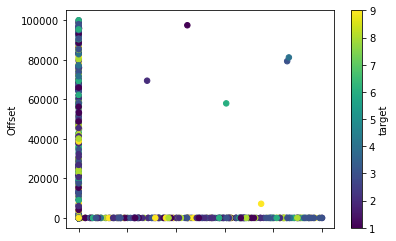

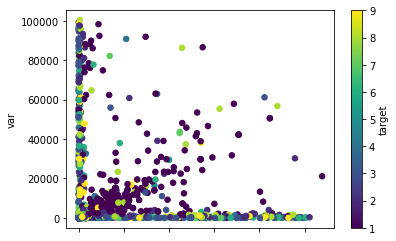

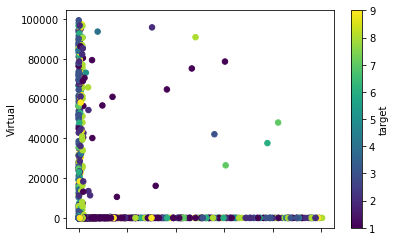

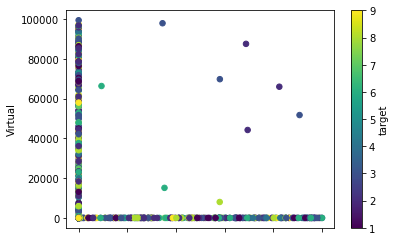

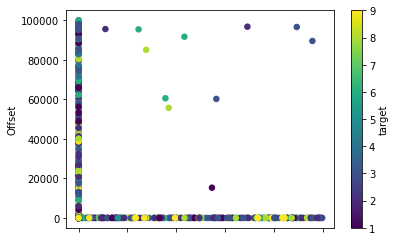

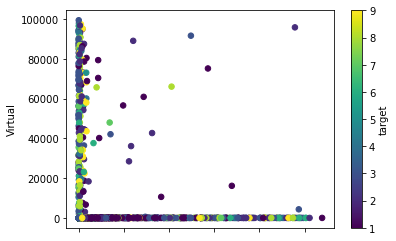

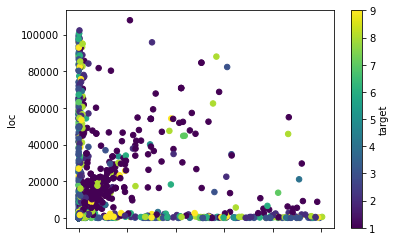

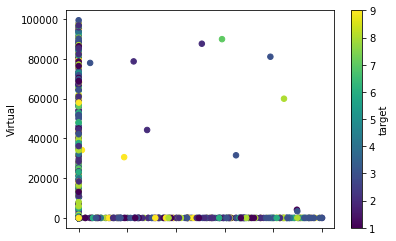

In [11]:
df.plot.scatter(x='UINT',y='Offset',s=30,c='target',colormap='viridis')
df.plot.scatter(x='loc',y='var',s=30,c='target',colormap='viridis')
df.plot.scatter(x='var',y='Virtual',s=30,c='target',colormap='viridis')
df.plot.scatter(x='Offset',y='Virtual',s=30,c='target',colormap='viridis')
df.plot.scatter(x='Forwarder',y='Offset',s=30,c='target',colormap='viridis')
df.plot.scatter(x='loc',y='Virtual',s=30,c='target',colormap='viridis')
df.plot.scatter(x='var',y='loc',s=30,c='target',colormap='viridis')
df.plot.scatter(x='UINT',y='Virtual',s=30,c='target',colormap='viridis')

just using some of the columns from the given dataset to plot the radviz plot

In [12]:
df1=data.filter(['Virtual','Offset','loc','Import','Imports','var','Forwarder','UINT','target'])

C:\Users\pragathi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:178: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


<AxesSubplot:>

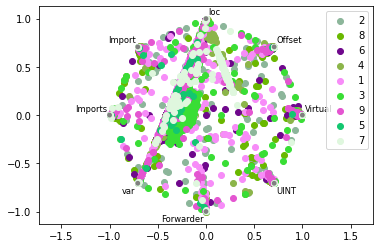

In [13]:
from pandas.plotting import radviz
radviz(df1, "target")

In [14]:
x=df.drop(['target'],axis=1)
y=df["target"]

In [15]:
classifier = LogisticRegression()
classifier.fit(x,y)
classifier.score(x,y)

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4938987797559512

using the logistic regression the score obtained for the virus classifcation is 49.38%

### decision tree

strengths:

1.generates understandable rules

2.performs classification without much computation

3.can handle both continuos and categorical variables

weakness:

1.expensive to train

2.less appropriate for estimating the tasks

3.more prone to errors

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [17]:
train_df, test_df= train_test_split(df)  #default for shuffle is True
print(len(train_df),len(test_df))
#help(train_test_split)
display(train_df)

3749 1250


,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
3499,3.0,3.000000,2103.0,6.000000,2.000000,1054.0,2.0,15.000000,7.0,23.000000,...,-5988.297455,-68602.108124,-109923.906288,-123684.433816,124834.478748,13538.450186,-33760.721758,222517.0,213458.0,2
4418,3.0,3.000000,885.0,21.000000,7.000000,542.0,7.0,7.000000,3.0,64154.199587,...,-108464.178864,21244.730885,-181567.507941,47397.545517,-194869.775719,55721.662013,-63170.674790,8296.0,4165.0,8
400,3.0,3.000000,995.0,15.000000,24972.309803,906.0,5.0,44.000000,13.0,64.000000,...,4361.152784,27497.741136,259797.547300,-146389.960525,-21515.170145,266507.531049,246495.548351,230545.0,208050.0,2
2452,4.0,4.000000,312.0,9.000000,0.000000,1190.0,3.0,0.000000,0.0,0.000000,...,100033.427994,-56836.791088,152386.435559,-109534.832499,225516.142273,-23872.255533,29267.629855,13606.0,12480.0,8
1121,3.0,3.000000,550.0,15.000000,5.000000,1574.0,5.0,6.000000,7.0,72115.484631,...,-103708.659040,-82457.570528,33727.206758,222908.637123,-118887.441948,41841.252910,-198283.095712,7755.0,6020.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,4.0,4.000000,1580.0,71034.116185,4.000000,92.0,0.0,53772.934444,9.0,31.000000,...,-117307.198516,25185.354234,-110731.982554,-20263.441083,86655.950662,-130735.886452,5590.637458,89448.0,65528.0,2
1696,3.0,3.000000,580.0,15.000000,5.000000,1574.0,5.0,6.000000,7.0,30.000000,...,-88053.458258,174250.062251,50658.180693,58027.027797,-51997.758988,-87303.290337,39816.837726,7648.0,6416.0,8
3396,3.0,3.000000,1115.0,3.000000,1.000000,671.0,1.0,0.000000,0.0,5.000000,...,-97338.636180,-128421.881111,-59742.085205,31471.445161,55860.417945,19535.987359,15919.487206,8155.0,5598.0,8
2122,3.0,3.000000,21.0,12.000000,4.000000,55.0,4.0,5.000000,0.0,14.000000,...,-154406.390111,-47427.039451,26039.368172,22600.840725,8478.400211,-153334.988807,-1273.499084,71994.0,68651.0,3


In [18]:
tree = DecisionTreeClassifier(max_depth=10)
#DecisionTreeClassifier(criterion='entropy')   #default criterion is 'gini'
#help(DecisionTreeClassifier)
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(max_depth=10)

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
y_pred = classifer.predict(X_test)

In [23]:
# importing the accuracy score
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_pred,y_test)

0.8192

In [24]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree_reg.fit(df.drop('target',axis=1),df['target'])

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [25]:
tree_reg.score(df.drop('target',axis=1), df['target'])

0.835258569064208

the score obtained for the given dataset using the decission tree classification method is 83.52%

### SVC

strengths:

1.works well

2.more productive in high dimensional spaces

3.it is effective in cases where number of dimensions are larger than specimens

weakness:

1.doesnot support large datasets

2.does not excute well in overlapping cases

3.there is probabilistic clarification for the classification


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
scores = cross_val_score(SVC(), X, y, cv=5)
scores.mean()

0.3644726726726727

the score obtained for the given dataset using the SVC cross validation is 36.44%

### KNN

strengths:

1.no training period

2.easy implementation

3.adding new data at any instance will not effect the model

weakness:

1.not suitable for larger datasets

2.sensitive to noise and missing data

3.feature scaling

not work well with high dimensionality

In [28]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
scores.mean()

0.7525509509509509

the score obtained for the given dataset using K nearest neighbours method is 75.25%

### feature selection
###### filter methods
strengths:

1.enables faster training

2.reduces complexity and intrepets the models easily

weakness:

1.risk of overfitting

2.more computation time there is more variables


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [30]:
lr = LogisticRegression(solver='liblinear')
print("Log. Reg. Mean Accuracy: ", cross_val_score(lr, X, y, cv=5).mean())

Log. Reg. Mean Accuracy:  0.6053183183183183


C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


the score obtained for the given dataset  before using the filter method in feature selection for logistic regression is 60.53%

In [31]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

In [32]:
mutual_info = mutual_info_classif(X, y)
print(mutual_info)

[0.20177513 0.21251448 0.69546741 ... 0.         0.92263711 0.95219386]


In [33]:
mf_select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="percentile", param=10)

In [34]:
mf_select.fit(X, y)    #fit to the data
X_mf = mf_select.transform(X)    #transform data to the selected feature space
print(X_mf.shape)

(4999, 181)


In [35]:
lr = LogisticRegression(solver='liblinear')

print("Log. Reg. MF k=10: ", cross_val_score(lr, X_mf, y, cv=5).mean())

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Log. Reg. MF k=10:  0.6079225225225224


C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


the score obtained for the given dataset using the feature selection method(mutual information) for logistic regression is 60.79%.

it is observed that with the feature selection method the accuracy for the given dataset is improved.

### Random Forest
strengths:

1.it can handle missing values

2.works well for categorical and continous variables

3.less impacted by noise

4.no feature scaling

5.handles non-linear parameters efficiently

weakness:

1.complexity

2.longer training period

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred_test = forest.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_test)

0.9072

the accuracy score obtained for the given dataset using the random forest method is 90.72%

### conclusion:
##### the accuracy scores obtained for various methods are listed below
##### logistic regression= 49.38%                
###### decission tree=83.52%             
##### SVC=36.44%               
##### KNN=75.25%        
##### logistic regression using feature selection=60.79%     
###### random forest=90.72%
##### from the above scores we can say that best classification method for the given dataset is random forest method with that we have obtained the accuracy of 90.72%it means we can clasify the virus easily with the random forest method compared to other methods used

## ref:
1.https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
2.http://localhost:8888/notebooks/Downloads/Lecture%2008%20k-NN%20and%20SVM%20and%20HW4.ipynb
3.http://localhost:8888/notebooks/Downloads/Lecture%2003%20Logistic%20Regression%20and%20HW2%20(pragathi)%20(1)%20(2).ipynb
4.http://localhost:8888/notebooks/Downloads/pragathi_decision%20tree_HW%203.ipynb
5.http://localhost:8888/notebooks/Downloads/pragathi_vunnam_HW4%20(1).ipynb
6.http://localhost:8888/notebooks/Downloads/pragathi_vunnam_HW5.ipynb
7.http://localhost:8888/notebooks/Downloads/Lecture%2012%20Feature%20Selection.ipynb